# Proceso completo de Machine Learning

## Introducción

Este notebook contiene el proceso completo de Machine Learning, desde la obtención de los datos hasta la evaluación del modelo. En este notebook se utilizará el dataset de [Titanic](https://www.kaggle.com/c/titanic/data) para predecir si un pasajero sobrevivió o no.

## Importando módulos

Primero, importamos los módulos necesarios para el proceso de Machine Learning:

* [Pandas](https://pandas.pydata.org/) es un módulo para el análisis de datos tabulares. Es el substituto de Excel y lo ocuparemos para la mayoría de las tareas de análisis y machine learning.
* [Seaborn](https://seaborn.pydata.org/) es un módulo para la visualización de datos y gráficos estadísticos. Está basado en Matplotlib y sirve para generar gráficos más atractivos de manera sencilla.
* [SKLearn](https://scikit-learn.org/stable/) es un módulo para el Machine Learning. Contiene todas las utilerias necesarias para preprocesar, entrenar y evaluar modelos.

A mi en lo personal me gusta siempre colocar mis módulos al inicio del notebook, para tenerlos a la mano y no tener que buscarlos en el código.

In [2]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, classification_report

## Descarga de datos: Titanic

Descargamos los datos en formato `.csv`. Este formato es superior al propietario de Microsoft `.xlsx` del programa Excel. Para ello ocupamos el método `read_csv` de la librería Pandas. Este método es sumamente poderoso, puede abrir tanto datos locales como aquellos localizados en internet mediante un URL.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Este sirve para guardar los datos de forma local
# df.to_csv("titanic.csv")

## Vista previa de los datos

Usamos el método `head` de Pandas para ver una vista previa de los datos. En este caso, se muestran las primeras 4 filas del dataset. Recibe un parámetro que indica el número de filas a mostrar, el default es 5.

In [4]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Información de los datos	

Con el método `info` de Pandas podemos ver información general de los datos. En este caso, se muestran el número de filas, el tipo de dato de cada columna y el número de datos no nulos.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Descripción estadística de los datos

El método `describe` de Pandas nos muestra la descripción estadística de los datos. En este caso, se muestran la media, la desviación estándar, el valor mínimo, el valor máximo y los cuartiles de cada columna.

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Mostrar una columna

Para mostrar una columna en particular, en forma de serie, se utilizan dos tipos de sintaxis:

La primera nos permite escoger la columna por nombre, siempre dentro de comillas simples o dobles. Sirve para cuando nuestras columnas tienen espacios.

La segunda, es una sintaxis más corta, pero solo funciona cuando las columnas no tienen espacios.

In [14]:
df["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [15]:
df.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

Para seleccionar varias columnas, le pasamos una lista al selector con el nombre de las columnas que queremos ocupar. Esto nos devuelve un dataframe. Si le pasamos el nombre de una sola columna, nos devuelve un dataframe de una sola columna en lugar de una serie.

In [ ]:
df[["Survived", "Sex"]]

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


## Exploración de básica de datos

La exploración básica consiste en conocer los datos, saber qué tipo de datos tenemos, qué valores toman, si hay valores nulos, etc.

Una de las primeras cosas que podemos hacer es realizar agrupaciones y contar elementos. En este caso, agrupamos por la columna `Survived` y contamos cuántos elementos hay en cada grupo. Esto nos da una idea de la proporción de sobrevivientes y no sobrevivientes.

In [20]:
df.groupby("Survived").size()

Survived
0    549
1    342
dtype: int64

Pandas tiene sus propios métodos para crear gráficos sencillos. En este caso, usamos el método `plot` para crear un gráfico de barras. El parámetro `kind` indica el tipo de gráfico que queremos crear, `bar` indica que queremos un gráfico de barras.

<AxesSubplot:xlabel='Survived'>

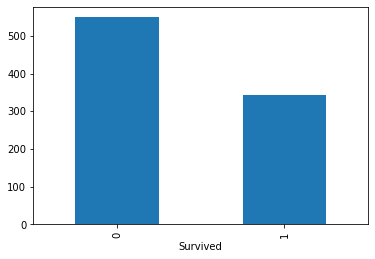

In [19]:
df.groupby("Survived").size().plot(kind="bar")

Sin embargo, Seaborn es capaz de crear gráficos más vistosos con menos código. En este caso, usamos el método `countplot` para crear un gráfico de barras. El parámetro `x` indica la columna que queremos graficar mientras que el parámetro `data` indica el dataframe que contiene los datos.

<AxesSubplot:xlabel='Survived', ylabel='count'>

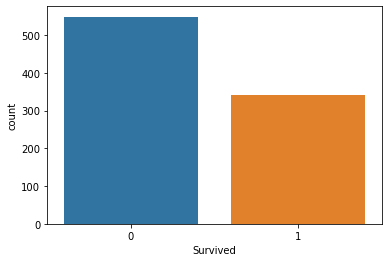

In [ ]:
sns.countplot(x="Survived", data=df)

Podemos hacer lo mismo con otra columna, por ejemplo, la columna `Sex`. En este caso, podemos ver que hay más hombres que mujeres en el barco.

In [22]:
df.groupby("Sex").size()

Sex
female    314
male      577
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

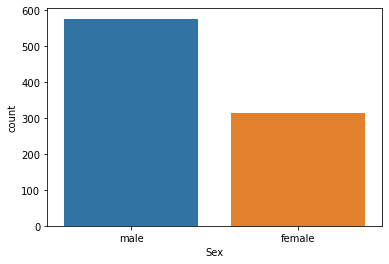

In [21]:
sns.countplot(x="Sex", data=df)

También podemos agrupar por varias columnas. En este caso, agrupamos por `Sex` y `Survived` y contamos cuántos elementos hay en cada grupo. Esto nos da una idea de la proporción de sobrevivientes y no sobrevivientes por género.

In [ ]:
df.groupby(["Survived", "Sex"]).size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

Para comparar ambos resultados, usamos el método `catplot` para graficar las columnas. Donde `col="Sex"` indica que se usará esa columna para los grupos, mientras que `kind="count"` indica que se usará un conteo.

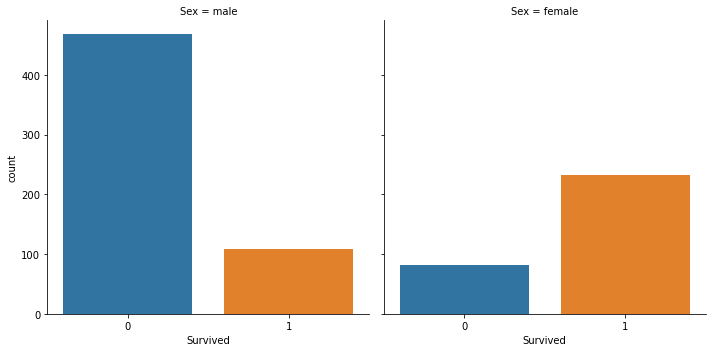

In [ ]:
sns.catplot(x="Survived", col="Sex", kind="count", data=df)

Si lo que queremos es obtener el número de mujeres que sobrevivieron, podemos usar la siguiente sintaxis. Primero creamos un índice booleano que nos dice si el sexo es femenino. Luego pasamos ese índice al dataframe por lo que nos va a devolver solo las filas donde el sexo es femenino. Finalmente, sumamos todos los valores, como muerto es cero y vivo es uno, nos va a devolver el número de mujeres que sobrevivieron.

In [ ]:
df[df["Sex"] == "female"]["Survived"].sum()

233

Para contar cuantas mujeres en total hay, usamos la misma sintaxis, pero en lugar de sumar, contamos los elementos. Aquí usé la sintaxis de la segunda forma, ya que no hay espacios en el nombre de la columna.

In [ ]:
df[df.Sex == "female"].Survived.count()

314

Si queremos saber la proporción de mujeres que sobrevivieron, dividimos el número de mujeres que sobrevivieron entre el número de mujeres en total.

In [ ]:
df[df["Sex"] == "female"]["Survived"].sum() / df[df.Sex == "female"].Survived.count()

0.7420382165605095

Lo mismo hacemos con los hombres. Podemos observar que sobrevivieron muchas más mujeres que hombre en proporción.

In [ ]:
df[df["Sex"] == "male"]["Survived"].sum() / df[df.Sex == "male"].Survived.count()

0.18890814558058924

Podemos hacer el análisis con otras columnas, por ejemplo, la que determina la clase en la que viajaba cada pasajero. En este caso, podemos ver que la mayoría de los pasajeros viajaban en tercera clase y fueron los que más fallecieron.

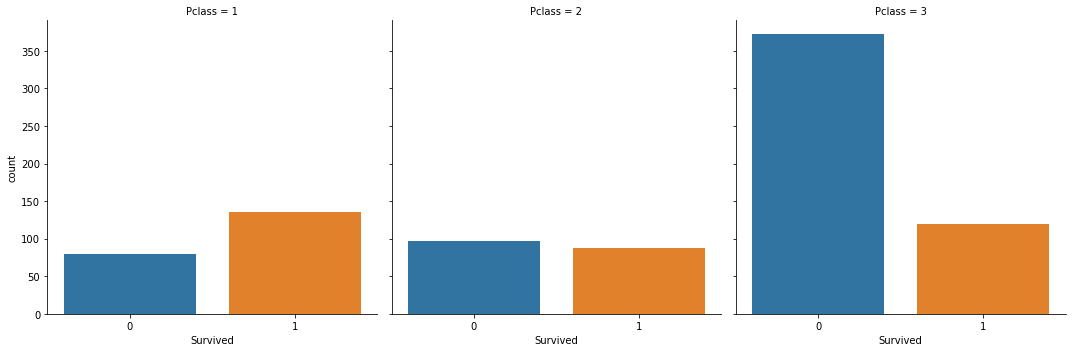

In [ ]:
sns.catplot(x="Survived", col="Pclass", kind="count", data=df)

In [ ]:
df.groupby("Pclass").size()

Pclass
1    216
2    184
3    491
dtype: int64

In [ ]:
df.groupby(["Pclass", "Survived"]).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

Probamos con la columna que define donde embarcaron los pasajeros. En este caso, podemos ver que la mayoría de los pasajeros embarcaron en Southampton y fueron los que más fallecieron.

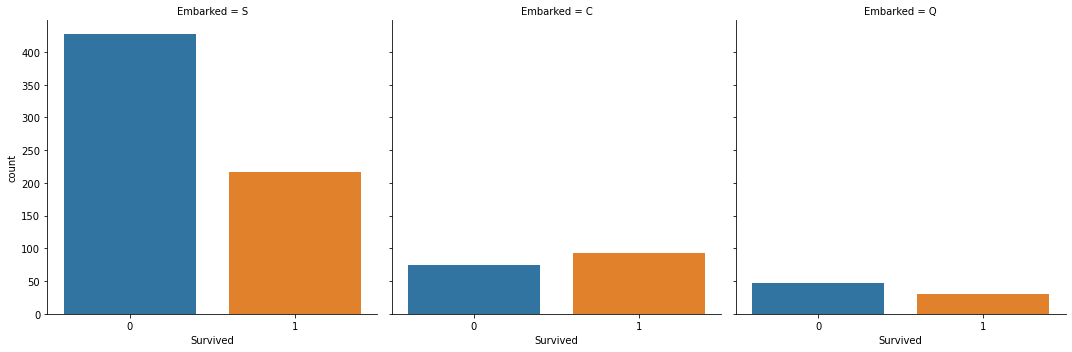

In [ ]:
sns.catplot(x="Survived", col="Embarked", kind="count", data=df)

In [ ]:
df.groupby(["Embarked", "Survived"]).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [ ]:
df.groupby(["Embarked", "Pclass"]).size()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
dtype: int64

In [ ]:
df.groupby(["Embarked", "Pclass", "Survived"]).size()

Embarked  Pclass  Survived
C         1       0            26
                  1            59
          2       0             8
                  1             9
          3       0            41
                  1            25
Q         1       0             1
                  1             1
          2       0             1
                  1             2
          3       0            45
                  1            27
S         1       0            53
                  1            74
          2       0            88
                  1            76
          3       0           286
                  1            67
dtype: int64

De esta forma podemos hacer una gráfica contando cuantos elementos hay en cada categoría de cada columna.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

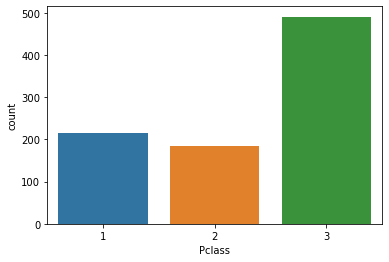

In [ ]:
sns.countplot(x="Pclass", data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

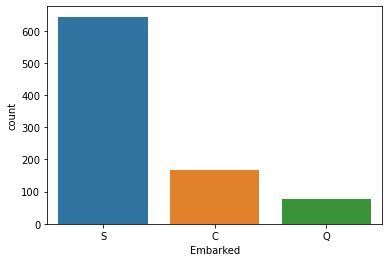

In [ ]:
sns.countplot(x="Embarked", data=df)

Podemos hacer una gráfica de distribución con la columna que define la tarifa. El argumento `kde` indica si queremos una gráfica de densidad o no.

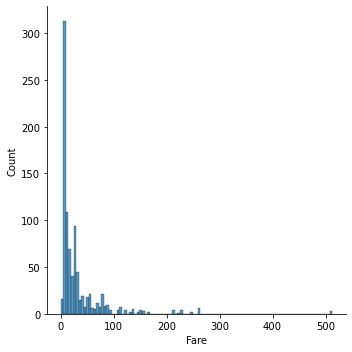

In [ ]:
sns.displot(df.Fare, kde=False)

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

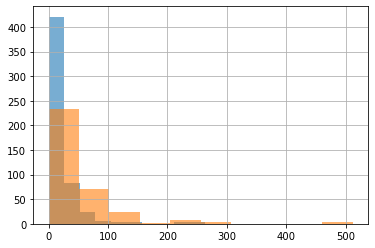

In [ ]:
df.groupby("Survived").Fare.hist(alpha=0.6)

In [ ]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


c:\Users\marco\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

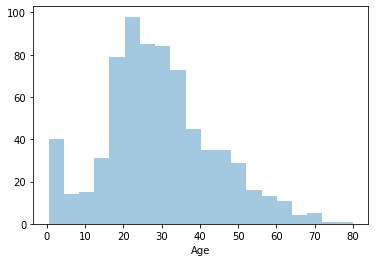

In [ ]:
sns.distplot(df.Age, kde=False)

c:\Users\marco\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

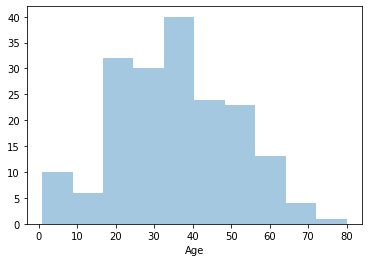

In [ ]:
sns.distplot(df.dropna().Age, kde=False)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

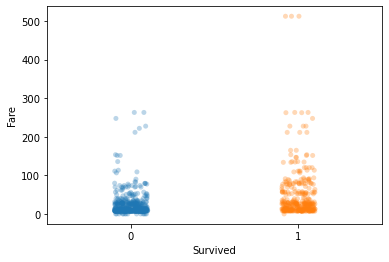

In [ ]:
sns.stripplot(x="Survived", y="Fare", data=df, alpha=0.3, jitter=True)

c:\Users\marco\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\marco\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

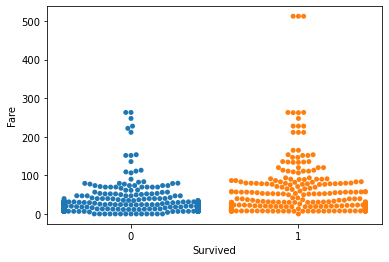

In [ ]:
sns.swarmplot(x="Survived", y="Fare", data=df)

In [ ]:
df.groupby("Survived").Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


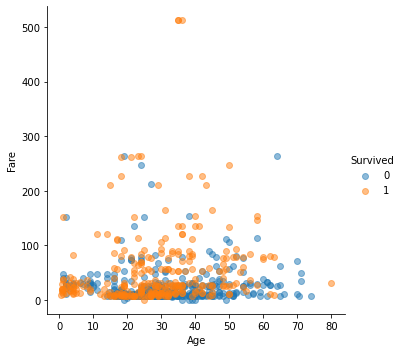

In [ ]:
sns.lmplot(x="Age", y="Fare", hue="Survived", data=df, fit_reg=False, scatter_kws={'alpha': 0.5})

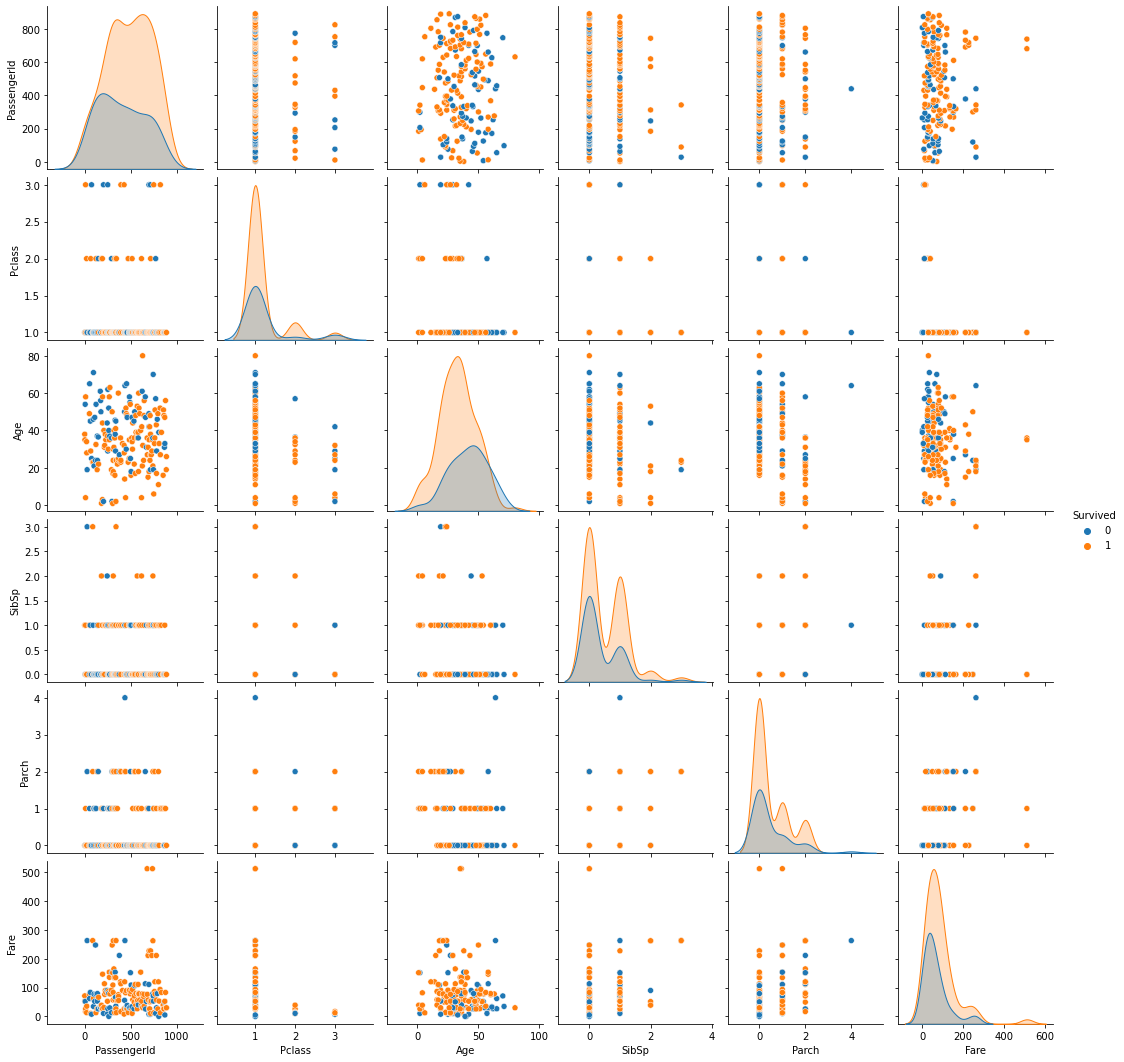

In [ ]:
sns.pairplot(df.dropna(), hue="Survived")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df["tiene_cabina"] = ~df.Cabin.isnull()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tiene_cabina
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [ ]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,tiene_cabina
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,True
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,True
4,0,3,male,35.0,0,0,8.0500,S,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    object 
 3   Age           714 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   Embarked      889 non-null    object 
 8   tiene_cabina  891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


In [ ]:
df["Age"] = df.Age.fillna(df.Age.median())

In [ ]:
df["Fare"] = df.Fare.fillna(df.Fare.median())

In [ ]:
df["Embarked"] = df.Embarked.fillna("S")

In [ ]:
df["CatAge"] = pd.qcut(df.Age, q=4, labels=False)

In [ ]:
df["CatFare"] = pd.qcut(df.Fare, q=4, labels=False)

In [ ]:
df.drop(["Age", "Fare"], axis=1, inplace=True)

In [ ]:
df

,Survived,Pclass,Sex,SibSp,Parch,Embarked,tiene_cabina,CatAge,CatFare
0,0,3,male,1,0,S,False,0,0
1,1,1,female,1,0,C,True,3,3
2,1,3,female,0,0,S,False,1,1
3,1,1,female,1,0,S,True,2,3
4,0,3,male,0,0,S,False,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,S,False,1,1
887,1,1,female,0,0,S,True,0,2
888,0,3,female,1,2,S,False,1,2
889,1,1,male,0,0,C,True,1,2


In [ ]:
df = pd.get_dummies(df)

In [ ]:
df

,Survived,Pclass,SibSp,Parch,tiene_cabina,CatAge,CatFare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,False,0,0,0,1,0,0,1
1,1,1,1,0,True,3,3,1,0,1,0,0
2,1,3,0,0,False,1,1,1,0,0,0,1
3,1,1,1,0,True,2,3,1,0,0,0,1
4,0,3,0,0,False,2,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,False,1,1,0,1,0,0,1
887,1,1,0,0,True,0,2,1,0,0,0,1
888,0,3,1,2,False,1,2,1,0,0,0,1
889,1,1,0,0,True,1,2,0,1,1,0,0


In [ ]:
x = df[df.columns.drop("Survived")]
y = df["Survived"]

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
# clf = DecisionTreeClassifier(max_depth=3)

clf = SVC()

In [ ]:
clf = clf.fit(train_x, train_y)

In [ ]:
y_pred = clf.predict(test_x)

In [ ]:
accuracy_score(test_y, y_pred)

0.8156424581005587

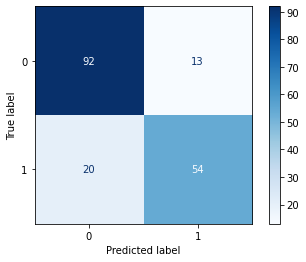

In [ ]:
ConfusionMatrixDisplay.from_predictions(test_y, y_pred, cmap="Blues")

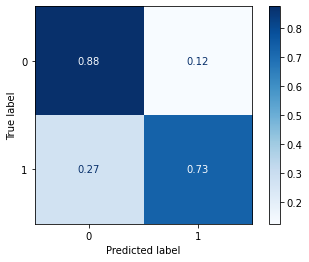

In [ ]:
ConfusionMatrixDisplay.from_predictions(test_y, y_pred, cmap="Blues", normalize='true')

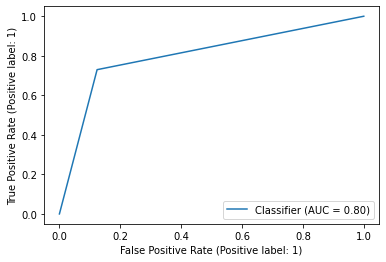

In [ ]:
RocCurveDisplay.from_predictions(test_y, y_pred)

In [ ]:
# plot_tree(clf, fontsize=10)

In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

